<a href="https://colab.research.google.com/github/sirinao/Retail-sales/blob/main/retail_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Loading the dataset
file_path1 = '/content/drive/MyDrive/Almabetter/Project/Data/Retail sale/Copy of Rossmann Stores Data.csv'
rossman = pd.read_csv(file_path1)

In [ ]:
# Loading the dataset
file_path2 = '/content/drive/MyDrive/Almabetter/Project/Data/Retail sale/Copy of store.csv'
store = pd.read_csv(file_path2)

In [ ]:
rossman.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [ ]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [ ]:
rossman.shape

(1017209, 9)

In [ ]:
rossman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
rossman.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
rossman.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
rossman.duplicated().sum()

0

In [ ]:
rossman['Date']= pd.to_datetime(rossman['Date'])

In [ ]:
rossman['year'] = rossman['Date'].dt.year
rossman['month'] = rossman['Date'].dt.month
rossman['published_day'] = rossman["Date"].dt.day_name()

In [ ]:

rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,published_day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,Friday


In [ ]:
store.shape

(1115, 10)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store.duplicated().sum()

0

In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
mean = store['CompetitionDistance'].mean()

In [ ]:
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(value=mean)

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis = 1, inplace = True)

In [ ]:
store.shape

(1115, 5)

In [ ]:
store.sample()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
1063,1064,a,c,420.0,0


In [ ]:
merge = pd.merge(rossman, store, on='Store', how = "inner")

In [ ]:
merge.shape

(1017209, 16)

In [ ]:
merge.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
year                   0
month                  0
published_day          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [ ]:
merge.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,5.430020e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,7.705298e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,7.100000e+02,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,2.330000e+03,1.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,6.880000e+03,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,7.586000e+04,1.000000e+00


In [ ]:
merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,published_day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,Friday,c,a,1270.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,Thursday,c,a,1270.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,Wednesday,c,a,1270.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,Tuesday,c,a,1270.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,Monday,c,a,1270.0,0


In [ ]:
merge.duplicated().sum()

0

In [ ]:
merge.drop(['Date','published_day','year','month'],axis = 1, inplace = True)

In [ ]:
merge.drop(['Open'],axis = 1, inplace = True)

In [ ]:
merge.sample()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
381079,418,2,7630,673,1,0,0,a,a,1060.0,1


In [ ]:
data_dummy=pd.get_dummies(merge,drop_first=True)
data_dummy.shape

(1017209, 17)

In [ ]:
# split the Dataset into independent(x) and dependent(y) Dataset
X = data_dummy.drop(columns= ['Sales'])
y = data_dummy['Sales']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Customers            1017209 non-null  int64  
 3   Promo                1017209 non-null  int64  
 4   SchoolHoliday        1017209 non-null  int64  
 5   CompetitionDistance  1017209 non-null  float64
 6   Promo2               1017209 non-null  int64  
 7   StateHoliday_0       1017209 non-null  uint8  
 8   StateHoliday_a       1017209 non-null  uint8  
 9   StateHoliday_b       1017209 non-null  uint8  
 10  StateHoliday_c       1017209 non-null  uint8  
 11  StoreType_b          1017209 non-null  uint8  
 12  StoreType_c          1017209 non-null  uint8  
 13  StoreType_d          1017209 non-null  uint8  
 14  Assortment_b         1017209 non-null  uint8  
 15

In [ ]:
# calling train_test_split() to get the training and testing data.

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)

(762906, 16)
(254303, 16)


In [ ]:
scaler=StandardScaler()
scaler.fit(X)
x=scaler.transform(X)

In [ ]:
#Fitting Linear regression on train data

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# predict the train and test dataset

y_pred_train = reg.predict(x_train)
y_pred = reg.predict(x_test)

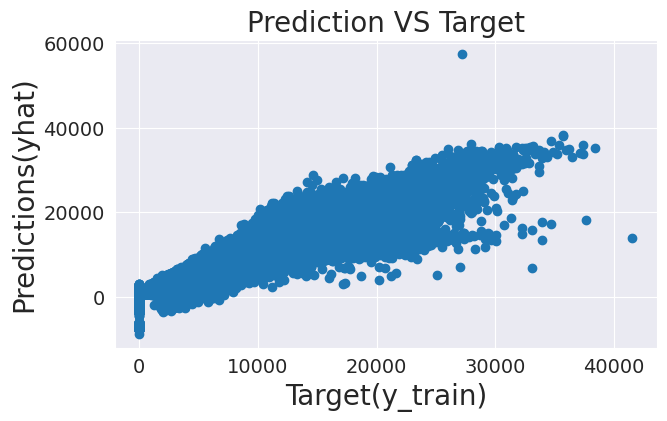

In [ ]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

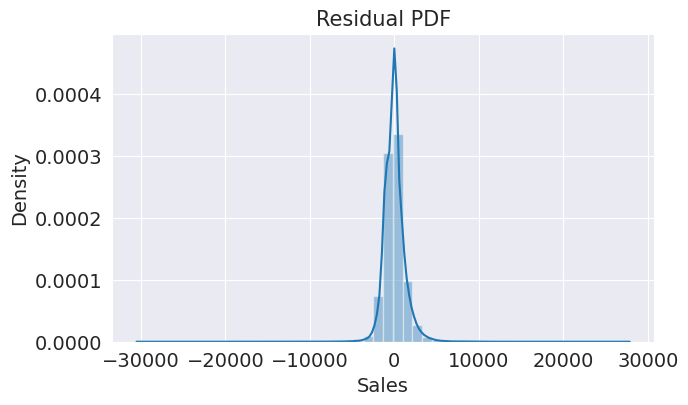

In [ ]:
sns.distplot(y_train-y_pred_train)
plt.title('Residual PDF',fontsize=15)
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)

1529575.558526888

In [ ]:
# Train performance
from numpy import math

math.sqrt(mean_squared_error(y_train, y_pred_train))

1238.4780670920832

In [ ]:
# Test performance

math.sqrt(mean_squared_error(y_test, y_pred))

1236.7601054880804

In [ ]:
R2 = reg.score(x_train,y_train)
Adjusted_R2_score = (1-(1-r2_score(y_train,y_pred_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

print('R2 Score of train : ', R2)
print('adjusted R2 score of train : ', Adjusted_R2_score)

R2 Score of train :  0.8967036022531987
adjusted R2 score of train :  0.8967014358274619


In [ ]:
r2 = r2_score(y_test, y_pred)
Adjusted_R2_score = (1-(1-r2_score(y_test,y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print('R2 Score of test : ', R2)
print('adjusted R2 score of test : ', Adjusted_R2_score)

R2 Score of test :  0.8967036022531987
adjusted R2 score of test :  0.896231821296029


In [ ]:
reg.intercept_

322.99039701217134

In [ ]:
reg.coef_

array([-9.16738220e-02, -1.04388771e+02,  7.60141119e+00,  1.11565683e+03,
        7.66531161e+01,  2.28601909e-02,  2.70801057e+02,  1.51440581e+02,
       -9.75058387e+02, -1.22906141e+03, -5.38112580e+02, -3.38060251e+03,
       -1.15572538e+02,  9.68774013e+02, -4.16671725e+03,  2.46195448e+02])

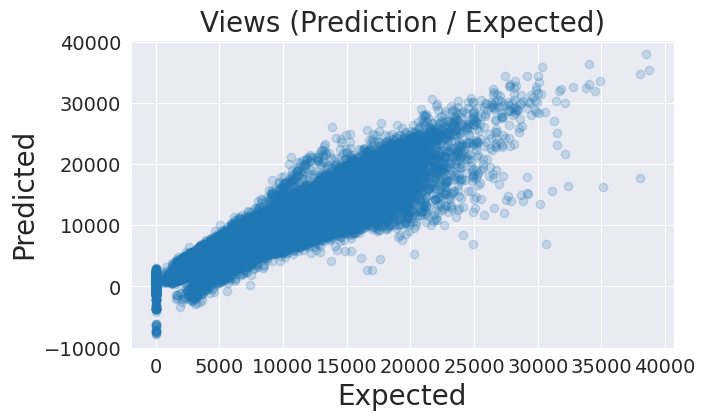

In [ ]:
yhat_test=reg.predict(x_test)
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Views (Prediction / Expected)',fontsize=20)
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1529575.558526888
RMSE : 1236.7601054880804


In [ ]:
MAE_reg = mean_absolute_error(y_test,y_pred)

In [ ]:
print('Mean absolute error : ', MAE_reg)

Mean absolute error :  882.9612717698285


In [ ]:
variability_df=pd.DataFrame({"R-Square":r2,"Adjusted R-Square":Adjusted_R2_score},index=["Values"])
variability_df

,R-Square,Adjusted R-Square
Values,0.896238,0.896232


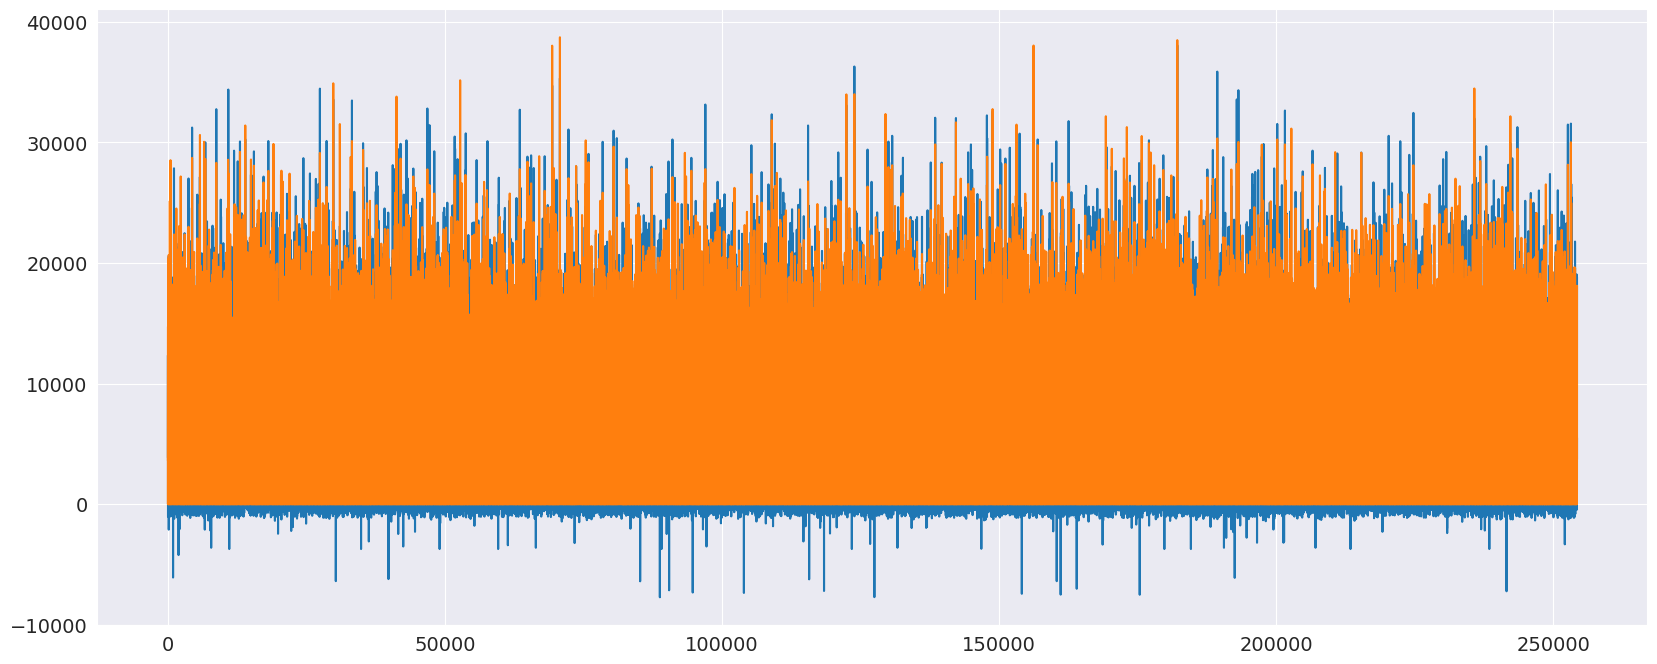

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.coef_

array([-9.16739622e-02, -1.04388760e+02,  7.60141171e+00,  1.11565649e+03,
        7.66512473e+01,  2.28602042e-02,  2.70800740e+02,  1.51441891e+02,
       -9.75051411e+02, -1.22904309e+03, -5.38084311e+02, -3.38060304e+03,
       -1.15571536e+02,  9.68774012e+02, -4.16670498e+03,  2.46195197e+02])

In [ ]:
# giving parameters

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -1533930.6661487832


In [ ]:
# predict the test dataset

y_pred_lasso = lasso_regressor.predict(x_test)

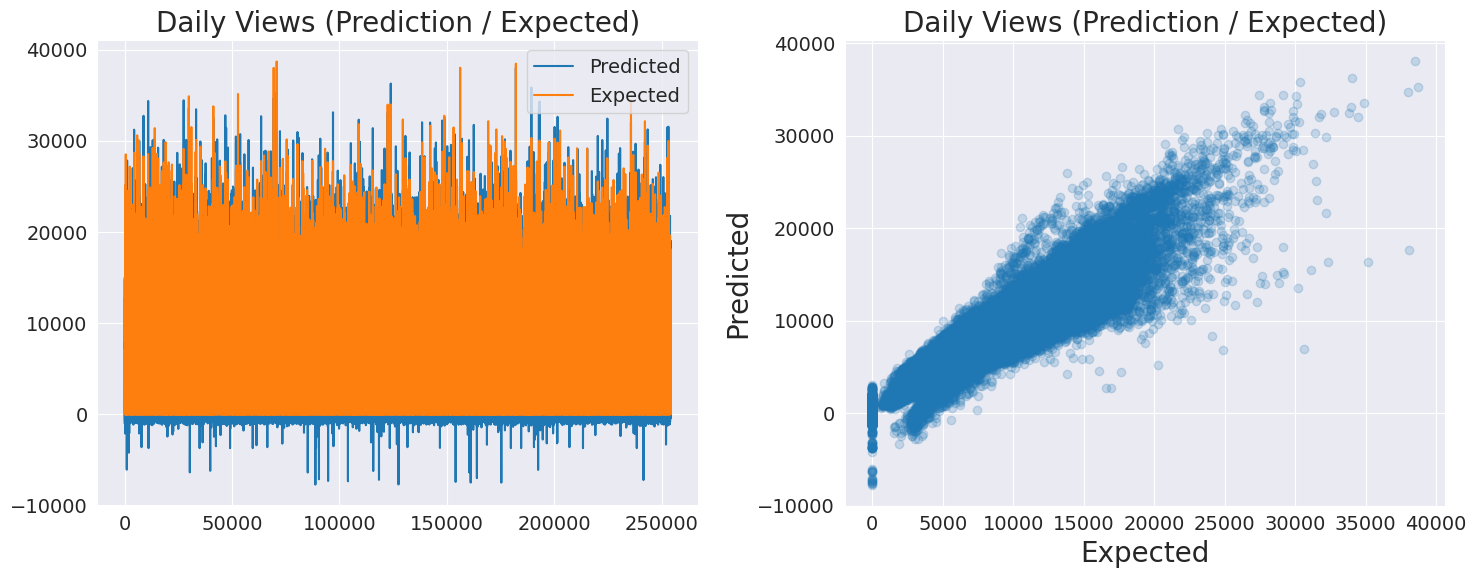

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_lasso,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MSE=mean_squared_error(y_test,y_pred_lasso)

RMSE=math.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [ ]:
print("MSE :" , MSE)

print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1529575.5585268878
RMSE : 1236.7601054880804
R2 : 0.8962383501116077
Adjusted R2 :  0.8962318212960291


In [ ]:
MAE_Lasso = mean_absolute_error(y_test,y_pred_lasso)

In [ ]:
print('Mean absolute error : ', MAE_Lasso)

Mean absolute error :  882.9612717698298


In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -1533985.3886714168


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1529575.551327849
RMSE : 1236.7601025776378
R2 : 0.896238350599968
Adjusted R2 :  0.8962318217844202


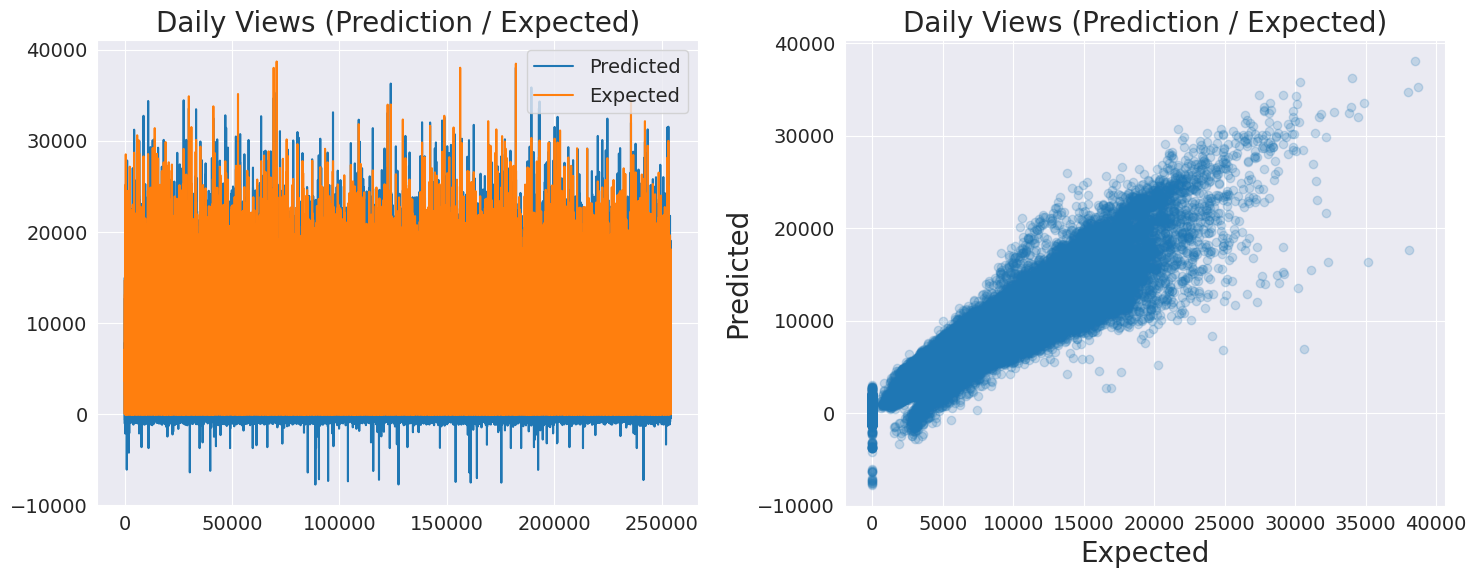

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_ridge,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MAE_Ridge = mean_absolute_error(y_test,y_pred_ridge)
print('Mean absolute error : ', MAE_Ridge)

Mean absolute error :  882.9612603581776


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)